   ID  Sand %  Clay %  Silt %     pH  EC mS/cm    O.M. %  CACO3 %  N_NO3 ppm  \
0   1    42.0    38.0    20.0  5.162     0.274  3.783414     0.00  14.462366   
1   2    54.0    26.0    20.0  6.071     0.355  1.451688     0.00  14.587814   
2   3    28.0    36.0    36.0  6.921     0.675  1.767599     0.40  14.910394   
3   4    58.0    20.0    22.0  7.704     0.355  0.718322     6.80   4.211470   
4   5    33.2    41.2    25.6  7.609     0.392  0.996625     4.39   6.111111   

       P ppm  K ppm   Mg ppm  Fe ppm  Zn ppm  Mn ppm  Cu ppm  B ppm  
0  18.608840     147    1115   91.32   0.894   27.06   1.768   0.40  
1  32.742137     180    1055   60.04   3.660   17.58   1.684   0.41  
2  19.024525     183    1215   61.24   3.060   18.00   1.840   0.46  
3   6.276846     116     327   19.54   1.640    5.04   0.844   0.50  
4   6.553970     228     939   25.84   0.180    7.16   1.216   0.40  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 17 colu

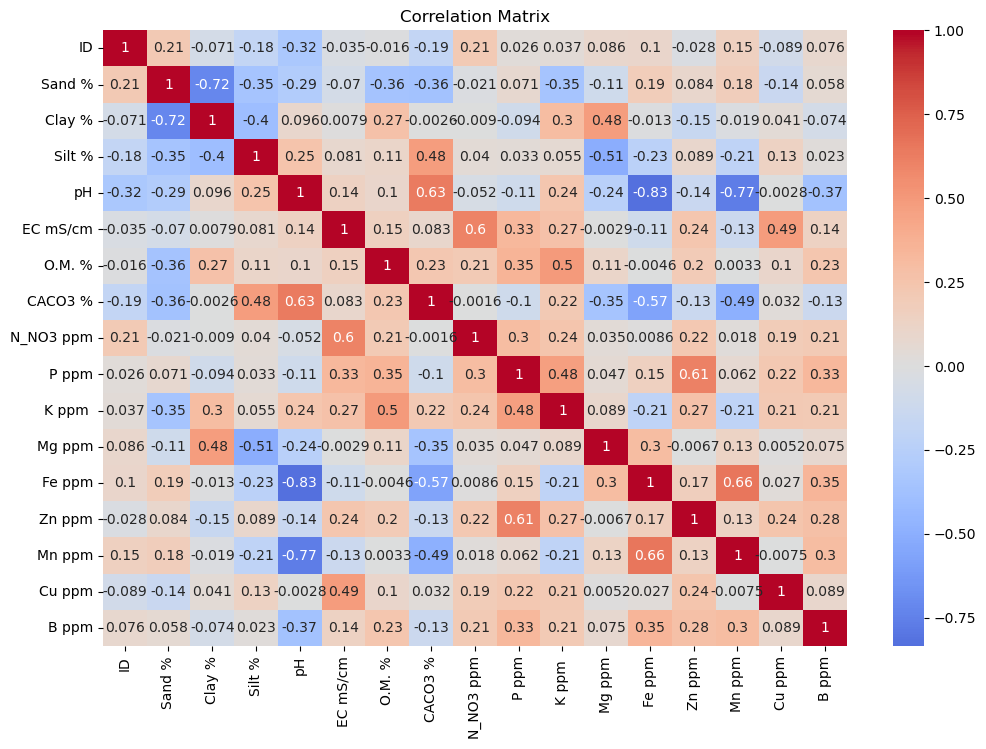

Model Performance:
RMSE: 0.9325
R-squared: 0.0469


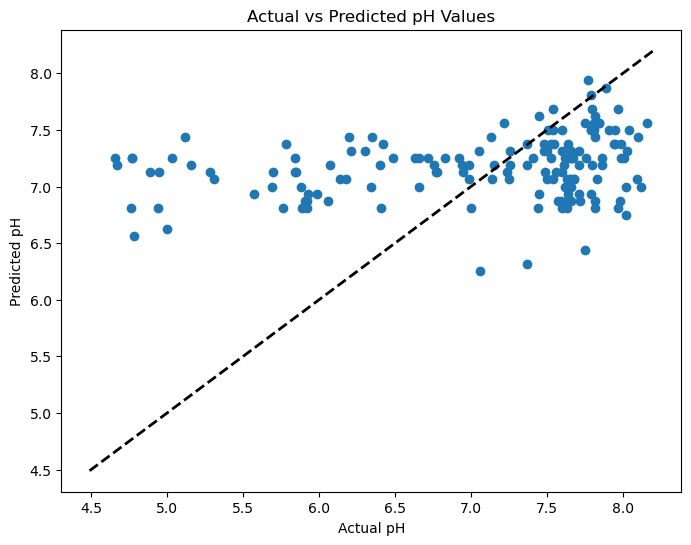

Model saved to soil_ph_model.pkl


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('SOIL DATA GR.xlsx', sheet_name='SOIL DATA')

# Explore the data
print(df.head())
print(df.info())
print(df.describe())

# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Select features and target
# Let's use soil composition (sand, clay, silt) and organic matter as predictors
X = df[['Sand %', 'Clay %', 'Silt %', 'O.M. %']]
y = df['pH']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

# Visualize predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual pH')
plt.ylabel('Predicted pH')
plt.title('Actual vs Predicted pH Values')
plt.show()

# Save the model to a pickle file
with open('soil_ph_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Also save the column names for reference in Streamlit
feature_columns = list(X.columns)
with open('feature_columns.pkl', 'wb') as file:
    pickle.dump(feature_columns, file)

print("Model saved to soil_ph_model.pkl")